In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


In [3]:
print(len(X_test))
print(len(X_train))

10000
60000


In [4]:
X_test[0].shape

(28, 28)

5


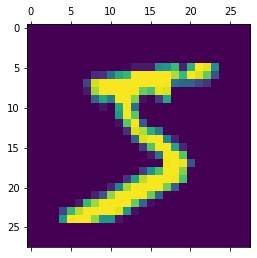

In [5]:
plt.matshow(X_train[0])
print(y_train[0])

In [6]:
X_train = X_train/np.max(X_train)
X_test = X_test/np.max(X_test)

In [7]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [8]:
model = keras.Sequential(
    [
        keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
    ]
)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 623us/step - loss: 0.4664 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 1s 609us/step - loss: 0.3036 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 1s 615us/step - loss: 0.2837 - accuracy: 0.9199
Epoch 4/5
1875/1875 [==============================] - 1s 583us/step - loss: 0.2731 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 1s 581us/step - loss: 0.2671 - accuracy: 0.9259


In [9]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 446us/step - loss: 0.2648 - accuracy: 0.9243


[0.2647678554058075, 0.9243000149726868]

In [10]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

array([1.9446403e-02, 3.2476453e-07, 6.4522862e-02, 9.6143210e-01,
       2.2819936e-03, 1.3657764e-01, 1.1617982e-06, 9.9981439e-01,
       1.0285115e-01, 7.1178305e-01], dtype=float32)

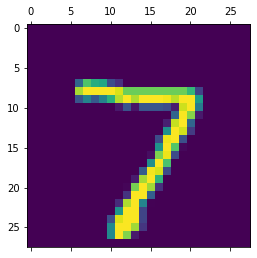

In [11]:
plt.matshow(X_test[0])

In [12]:
# np.argmax finds a maximum element from an array and returns the index of it
np.argmax(y_pred[0]) 

7

In [13]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

Text(69.0, 0.5, 'Truth')

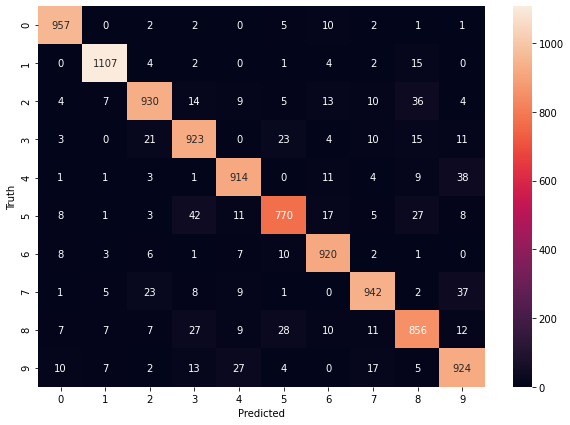

In [14]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using hidden layer

In [15]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 958us/step - loss: 0.2752 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 2s 916us/step - loss: 0.1226 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 2s 876us/step - loss: 0.0854 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 2s 873us/step - loss: 0.0656 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 2s 890us/step - loss: 0.0516 - accuracy: 0.9844


Using hidden layer improves accuracy

In [16]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 603us/step - loss: 0.0779 - accuracy: 0.9773


[0.0779384896159172, 0.9772999882698059]

*Using Flatten layer so that we don't have to call .reshape on input dataset*

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 951us/step - loss: 0.2733 - accuracy: 0.9217
Epoch 2/10
1875/1875 [==============================] - 2s 877us/step - loss: 0.1217 - accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.0843 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 2s 888us/step - loss: 0.0643 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 2s 905us/step - loss: 0.0507 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 2s 893us/step - loss: 0.0395 - accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 2s 869us/step - loss: 0.0321 - accuracy: 0.9903
Epoch 8/10
1875/1875 [==============================] - 2s 879us/step - loss: 0.0271 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 2s 885us/step - loss: 0.0224 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 2s 882u

In [18]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 603us/step - loss: 0.0950 - accuracy: 0.9750


[0.09499220550060272, 0.9750000238418579]

313/313 [==============================] - 0s 609us/step - loss: 0.0950 - accuracy: 0.9750
[0.09499220550060272, 0.9750000238418579]


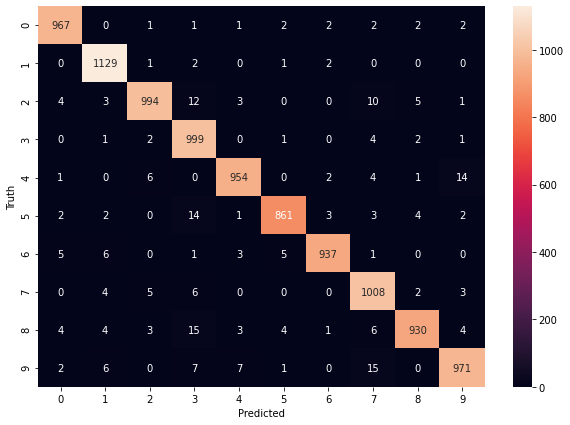

In [19]:
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(model.evaluate(X_test,y_test))